# Исследование объявлений о продаже квартир в Санкт-Петербурге 

## Описание проекта:

В исследовании используются данны с сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. 

Цель - исследовать и опраделить признаки влияющие на рыночную стоимость объектов недвижимости. Что позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.



## Содержание:
* [1.Открытие файла. Общая информация о данных.](#section_1)
* [2.Предобработка данных](#section_2_1)
    * [2.1 Замена нулевых значений.](#section_2_2)
    * [2.2 Нахождение и замена аномальных значений.](#section_2_3)
    * [2.3 Изменение типа данных.](#section_2_4)
* [3.Добавление новых полей](#section_3)
* [4.Исследование данных](#section_4)
    * [4.1 Изучение параметров: площадь, цена, число комнат, высота потолков.](#section_4_1)
    * [4.2 Время продажи квартиры.](#section_4_2)
    * [4.3. Исследование стоимости](#section_4_3)
    * [4.4. Населенные пункты с нибольшей и нименьшей стоимостью жилья.](#section_4_4)
    * [4.5 Анализ зависимости стоимости квартир в Санкт - Петербурге.](#section_4_5)
* [Общий вывод исследования](#section_5)


## 1.Открытие файла. Общая информация о данных.<a class="anchor" id="section_1">

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats.mstats import winsorize
pd.options.display.float_format = '{:,.2f}'.format
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [4]:
df = pd.read_csv(r"C:\Users\79520\OneDrive\Рабочий стол\проекты YP\Определение рыночной стоимости жилья\real_estate_data.csv", sep='\t')
display('----------------------------------------------')
display('Количество дубликатов', df.duplicated().sum())
display('----------------------------------------------')
df.info()
df.describe()


'----------------------------------------------'

'Количество дубликатов'

0

'----------------------------------------------'

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,699.00","23,699.00","23,699.00","23,699.00","14,504.00","23,613.00","21,796.00","23,699.00","21,421.00","12,180.00","18,157.00","18,180.00","18,181.00","8,079.00","18,181.00","9,110.00","20,518.00"
mean,9.86,"6,541,548.77",60.35,2.07,2.77,10.67,34.46,5.89,10.57,1.15,"28,793.67","14,191.28",0.61,490.80,0.77,517.98,180.89
std,5.68,"10,887,013.27",35.65,1.08,1.26,6.60,22.03,4.89,5.91,1.07,"12,630.88","8,608.39",0.80,342.32,0.94,277.72,219.73
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,1.30,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.52,5.00,18.60,2.00,7.00,0.00,"18,585.00","9,238.00",0.00,288.00,0.00,294.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.10,1.00,"26,726.00","13,098.50",0.00,455.00,1.00,502.00,95.00
75%,14.00,"6,800,000.00",69.90,3.00,2.80,16.00,42.30,8.00,12.00,2.00,"37,273.00","16,293.00",1.00,612.00,1.00,729.00,232.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Из представленной информации полагаю целесообразным более подробно изучить следующие данные:

1. Столбцы с нулевыми значениями. Необходимо провести анализ характера пропусков, заменить значения, где это возмжно.
2. Столбцы с аномальными занчениями:
    * ceiling_height- слишком высокое максимальное значение

## 2. Предобработка данных.<a class="anchor" id="section_2_1">

### Замена нулевых значений<a class="anchor" id="section_2_2">

Нулевые значений представлены в следующих столбцах:


* living_area              1903 
* kitchen_area             2278 
* balcony                 11519 
* airports_nearest         5542 
* cityCenters_nearest      5519 
* parks_around3000         5518
* parks_nearest           15620 
* ponds_around3000         5518 
* ponds_nearest           14589 

Считаю целесообразным 
1. Заменить пропущенные значения в столбцах с расстояниями до объектов, посчитав расстояний по населенным пунктам.
2. Заменить пропуски в столбцах 'balcony' и 'is_apartmen' на 0 т.к. в некоторых квартирах может отсутствовать балкон, а 0 в столбце 'is_apartmen' говорит о том, что квартира не является апартаментами.

Последовательно применяем функцию для замены значений медианными к столбцам: airports_nearest,ponds_nearest, parks_nearest.

In [5]:
median_airports = df.groupby('locality_name')['airports_nearest'].median().to_dict()
 
def airports(row):
    if pd.isna(row['airports_nearest']):
        return median_airports.get(row['locality_name'])
    return row['airports_nearest']
 
df['airports_nearest'] = df.apply(airports, axis=1)


In [6]:
median_cityCenters_nearest = df.groupby('locality_name')['cityCenters_nearest'].median().to_dict()
 
def cityCenters_nearest(row):
    if pd.isna(row['cityCenters_nearest']):
        return median_cityCenters_nearest.get(row['locality_name'])
    return row['cityCenters_nearest']
 
df['cityCenters_nearest'] = df.apply(cityCenters_nearest, axis=1)

In [7]:
median_parks_nearest = df.groupby('locality_name')['parks_nearest'].median().to_dict()
 
def parks(row):
    if pd.isna(row['parks_nearest']):
        return median_parks_nearest.get(row['locality_name'])
    return row['parks_nearest']
 
df['parks_nearest'] = df.apply(parks, axis=1)


In [8]:
median_ponds_nearest = df.groupby('locality_name')['ponds_nearest'].median().to_dict()
 
def ponds(row):
    if pd.isna(row['ponds_nearest']):
        return median_ponds_nearest.get(row['locality_name'])
    return row['ponds_nearest']
 
df['ponds_nearest'] = df.apply(ponds, axis=1)


In [9]:
# заменим высоту потолков медианным значением спо квартирам с той же этажностью
median_floors = df.groupby('floor')['ceiling_height'].median().to_dict()
 
def ceiling_height_func(row):
    if pd.isna(row['ceiling_height']):
        return median_floors.get(row['floor'])
    return row['ceiling_height']
 
df['ceiling_height'] = df.apply(ceiling_height_func, axis=1)

In [10]:
#Заменяем пропуски в значениях количества балконов и поле 'is_apartment' на 0
df['balcony'] = df['balcony'].fillna(0)
df['is_apartment'] = df['is_apartment'].fillna(0)

In [11]:
#В строке столбце с местоположением есть незначительное количество нулевых значений, считаю целесообразным удалить строки.
df.dropna(subset = ['locality_name'], inplace = True)

In [12]:
# заменим площадь кухни на  0 в квартирах - студиях и свободной планировкой
df['kitchen_area'] = df['kitchen_area'].mask(df['studio']| df.open_plan, 0)

# для заполнения пропусках в living area и оставшихся в kithen area посчитаем среднее соотношение площадей и 
# применим это значение к пропущенным значениям
df_with_kithen = df.query('kitchen_area > 0')
df_with_kithen_median = (df_with_kithen['kitchen_area']/df_with_kithen['total_area']).mean()
print(f'В среднем кухня занимает:{df_with_kithen_median:.1%} от общей площади')
df['kitchen_area'] = df['kitchen_area'].fillna(df['total_area'] * df_with_kithen_median )


# тоже самое проделаем для жилой площади
df_livin_area = df.query('kitchen_area > 0')
df_livin_area_median  = (df_livin_area['living_area']/df_livin_area['total_area']).mean()
print(f'В среднем кухня занимает:{df_livin_area_median:.1%} от общей площади')
df['living_area'] = df['living_area'].fillna(df['total_area'] * df_livin_area_median)


В среднем кухня занимает:18.7% от общей площади
В среднем кухня занимает:56.4% от общей площади


In [13]:
df.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             4
floors_total              85
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest        5386
cityCenters_nearest     5386
parks_around3000        5510
parks_nearest           5998
ponds_around3000        5510
ponds_nearest           5494
days_exposition         3180
dtype: int64

### Вывод.

В результате применения функции заменяющей значения на медианные в столбцах с расстояниями до объекта, а так же заменой пропущенных значений в столбцах balcony и is_apartment удалось заvенить достаточное количество пропущенных значений на релевантные.

### 2.3 Нахождение и замена аномальных значений. <a class="anchor" id="section_2_3">

In [14]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,"23,650.00","23,650.00","23,650.00","23,650.00","23,646.00","23,565.00","23,650.00","23,650.00","23,650.00","23,650.00","18,264.00","18,264.00","18,140.00","17,652.00","18,140.00","18,156.00","20,470.00"
mean,9.86,"6,541,126.90",60.33,2.07,2.72,10.68,34.55,5.89,10.52,0.59,"28,873.68","14,238.31",0.61,475.97,0.77,509.42,180.75
std,5.68,"10,896,399.18",35.66,1.08,0.99,6.59,22.33,4.88,6.14,0.96,"12,680.04","8,624.46",0.80,235.65,0.94,200.36,219.78
min,0.00,"12,190.00",12.00,0.00,1.00,1.00,2.00,1.00,0.00,0.00,0.00,181.00,0.00,1.00,0.00,13.00,1.00
25%,6.00,"3,400,000.00",40.00,1.00,2.60,5.00,19.00,2.00,7.00,0.00,"18,625.00","9,289.00",0.00,428.50,0.00,462.00,45.00
50%,9.00,"4,650,000.00",52.00,2.00,2.65,9.00,30.00,4.00,9.00,0.00,"26,757.50","13,107.00",0.00,460.00,1.00,503.00,95.00
75%,14.00,"6,799,000.00",69.70,3.00,2.70,16.00,42.08,8.00,12.00,1.00,"37,348.00","16,318.25",1.00,460.00,1.00,561.00,231.00
max,50.00,"763,000,000.00",900.00,19.00,100.00,60.00,409.70,33.00,112.00,5.00,"84,869.00","65,968.00",3.00,"3,190.00",3.00,"1,344.00","1,580.00"


Из сводной таблице выидим, что максимальное значение в столбце 'ceiling_height' явно отличается от возможного. Необходимо более детально исследовать данные.

In [15]:
df['ceiling_height'].sort_values(ascending = False).head(15)

22869   100.00
3148     32.00
22336    32.00
21377    27.50
5246     27.00
21824    27.00
10773    27.00
4876     27.00
20478    27.00
17857    27.00
22938    27.00
5807     27.00
5669     26.00
4643     25.00
14382    25.00
Name: ceiling_height, dtype: float64

В данных указаны неправдоподобные результаты, вероятная причина - в некоторых наблюдениях использовалась отличная мера измерения. 

Решение проблемы - делим значения больше 10 на 10, тем самым приводим наблюдения к одной еденице - метру.

In [16]:
df.loc[df['ceiling_height'] > 10, 'ceiling_height'] = df.loc[df['ceiling_height'] > 10, 'ceiling_height'] /10
df['ceiling_height'].sort_values(ascending = False).head(15)

22869   10.00
5863     8.30
3474     8.00
15743    8.00
17442    8.00
20264    6.00
21227    5.80
1388     5.60
7578     5.50
1026     5.30
12628    5.30
464      5.20
1053     5.00
21923    4.90
2802     4.80
Name: ceiling_height, dtype: float64

## Вывод.
Были выявлены аномальные значния в данных о высоте потолков, змененены на релевантные.

### 2.4. Изменение типа данных. <a class="anchor" id="section_2_4">

In [17]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23646 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  object 
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Из таблицы видно, что некоторые типы данных указаны некорретно, что может привести к появлению проблем при дальнейшем исследовании. 

Необходимо изменить данные в следующих столбцах: 
* floors_total, 
* is_apartment, 
* balcony, 
* first_day_exposition, 
* ponds_around3000, 
* parks_around3000
* days_exposition

In [18]:
df['floors_total'] = df['floors_total'].fillna(0)

# прежде чем менять типы данных в остальным стообцах, так же заменим пропуски в них на "0" т.к. nan препятствует изменению формата

df['ponds_around3000'] = df['ponds_around3000'].fillna(0) 
df['parks_around3000']= df['parks_around3000'].fillna(0)
df['days_exposition'] = df['days_exposition'].fillna(-1)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['floors_total'] = df['balcony'].astype('int')
df['days_exposition'] = df['days_exposition'].astype(int)
df['is_apartment'] = df['is_apartment'].astype('bool')

#приводим дату к формату времени, исключив часы-минуты-секунды т.к. значение их 00-00-00
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format = '%Y-%m-%d')

#проверяем полученный результат
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23650 non-null  int64         
 1   last_price            23650 non-null  float64       
 2   total_area            23650 non-null  float64       
 3   first_day_exposition  23650 non-null  datetime64[ns]
 4   rooms                 23650 non-null  int64         
 5   ceiling_height        23646 non-null  float64       
 6   floors_total          23650 non-null  int32         
 7   living_area           23650 non-null  float64       
 8   floor                 23650 non-null  int64         
 9   is_apartment          23650 non-null  bool          
 10  studio                23650 non-null  bool          
 11  open_plan             23650 non-null  bool          
 12  kitchen_area          23650 non-null  float64       
 13  balcony         

### Вывод:

Форматы данных были скорректироаны для удобной работы в дальнейшем. Пропуски в поле 'days_exposition' были заменены на отрицательное значени, т.к. замену на ноль в этом случае сичтаю некооректной - могут бытть реальные нулевы значения.

## 3. Добавление новых полей.<a class="anchor" id="section_3">

In [19]:
# расчет цены квадратного метра
df['cost_per_metrs'] = df['last_price']/df['total_area'] 

In [20]:
# извлечение времени
df['year_first_day_exposition'] = df['first_day_exposition'].dt.year
df['day_first_day_exposition'] = df['first_day_exposition'].dt.weekday
df['month_first_day_exposition'] = df['first_day_exposition'].dt.month

In [21]:
# категоризация по этажам, добавление столбца с категориями
def floor_type(row):
    floor = row['floor']
    last_flor = row['floors_total']
    if floor == 1:
        return 'первый'
    if floor  == last_flor:
        return 'последний'
    else:
        return 'другой'
    
df['floor_type_column'] = df.apply(floor_type, axis=1)

In [20]:
# соотношение площадей
df['living_total_ration'] = df['living_area']/df['total_area']
df['kitchen_total_ratiom'] = df['kitchen_area']/df['total_area']

### Вывод.
Были добавлены новые поля: 'floor_type_column', 'year_first_day_exposition', 'day_first_day_exposition', 'month_first_day_exposition' необходимые для дальнейшего исследования.

## 4. Исследование данных<a class="anchor" id="section_4">

### 4.1 Изучение параметров: площадь, цена, число комнат, высота потолков.<a class="anchor" id="section_4_1">

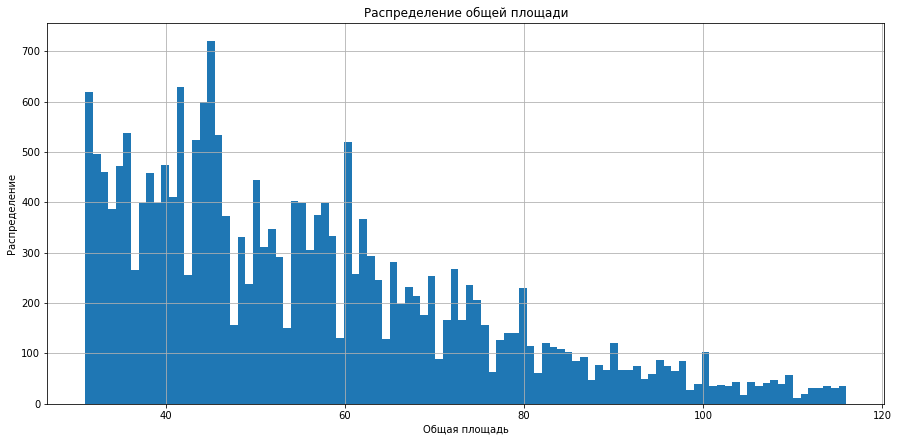

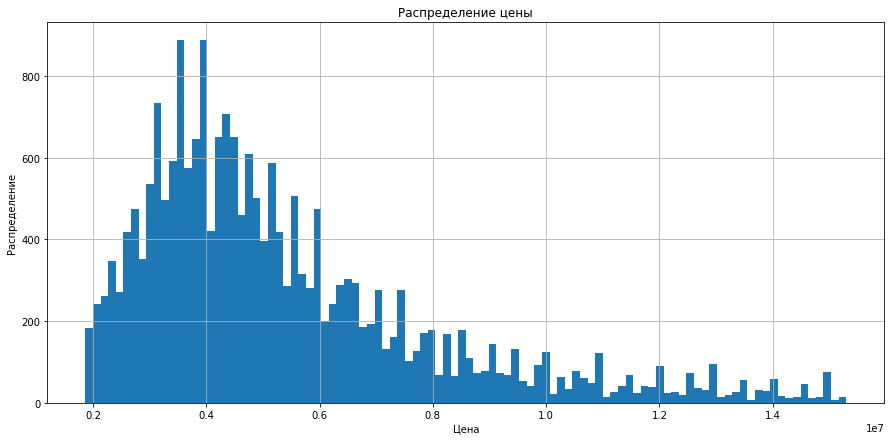

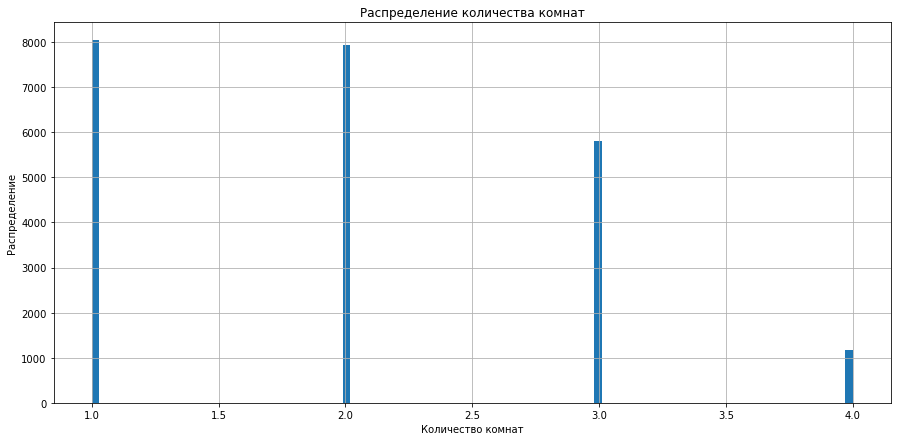

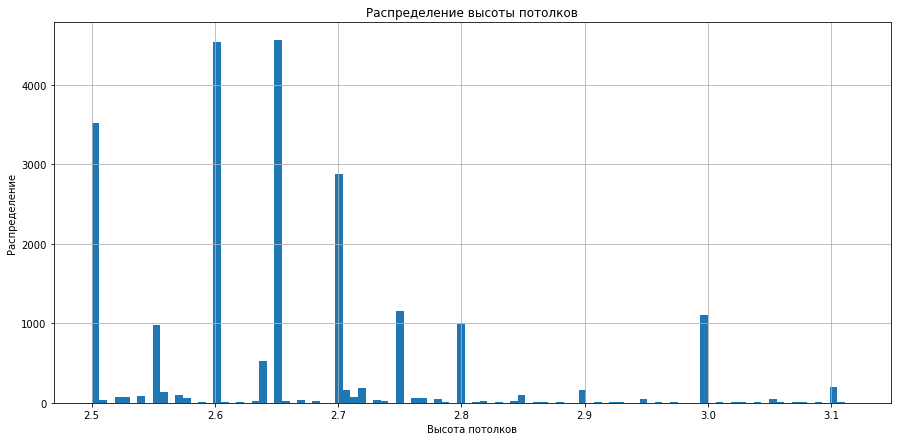

In [28]:
# строим гистограммы для изучаемых параметров
# для того, чтобы отбросить выбросы ограничим наблюдаемые значения интервалом от 5 до 95%

columns = ['total_area', 'last_price', 'rooms', 'ceiling_height']
names =['Распределение общей площади', 'Распределение цены', 'Распределение количества комнат', 'Распределение высоты потолков']
xlabel = ['Общая площадь', 'Цена', 'Количество комнат', 'Высота потолков']
for i in range(len(columns)):
    q1 =  df[columns[i]].quantile(0.05)
    q2 = df[columns[i]].quantile(0.95)
    ranges = (q1, q2)
    df.plot(y = columns[i], kind = 'hist', bins = 100, grid=True, figsize = (15,7), range = ranges, title = names[i], legend = False)
    plt.xlabel(xlabel[i])
    plt.ylabel('Распределение')
    df[columns[i]].describe()
    

### Вывод.

В результате анализа построенных гистограмм можем утверждать, что наиболее распространены объявления о продаже квартир с площадью до 65 кв.м. имеющие до 3-х комнат с преобладающей высотой потолков в 2.5 метра.

### 4.2 Время продажи квартиры.<a class="anchor" id="section_4_2">

count   20,470.00
mean       180.75
std        219.78
min          1.00
25%         45.00
50%         95.00
75%        231.00
max      1,580.00
Name: days_exposition, dtype: float64


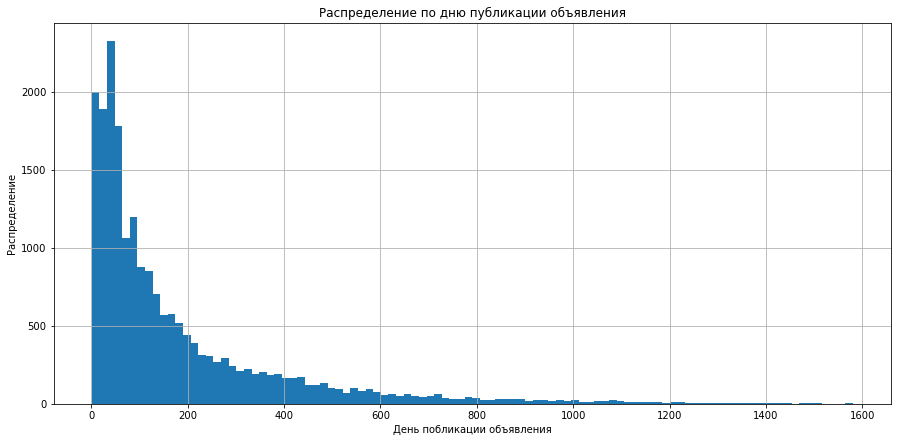

In [29]:
#изучаем время продажи квартир
#сразу отбросим строки,которые ранее были заменены на -1
df['days_exposition'] = df.loc[df['days_exposition'] > 0, 'days_exposition']

df['days_exposition'].plot(kind = 'hist', bins = 100, grid=True, figsize = (15,7))
plt.xlabel('День побликации объявления')
plt.ylabel('Распределение')
plt.title("Распределение по дню публикации объявления")


print(df['days_exposition'].describe())


Text(0.5, 0, 'День публикации объявления.')

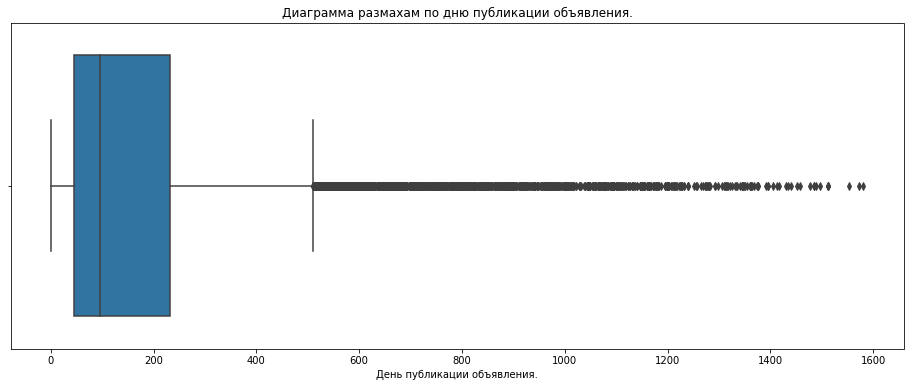

In [23]:
# для определения отклоняющихся значений построим ящик с усами
plt.figure(figsize=(16, 6))
plt.title('Диаграмма размахам по дню публикации объявления.')
sns.boxplot(df['days_exposition'])
plt.xlabel("День публикации объявления.")


Из анализа графика boxpolt видим, что нижний 'ус' упирается в '0' - минимальное значение. 
Верхний около 500 - 1.5 межквартильного размаха, добавленного к 3-му квартилю, все остальное сичтаем вбросами. 
Дополнительно построим гистограмму огрничившись значениями от 0 до 500

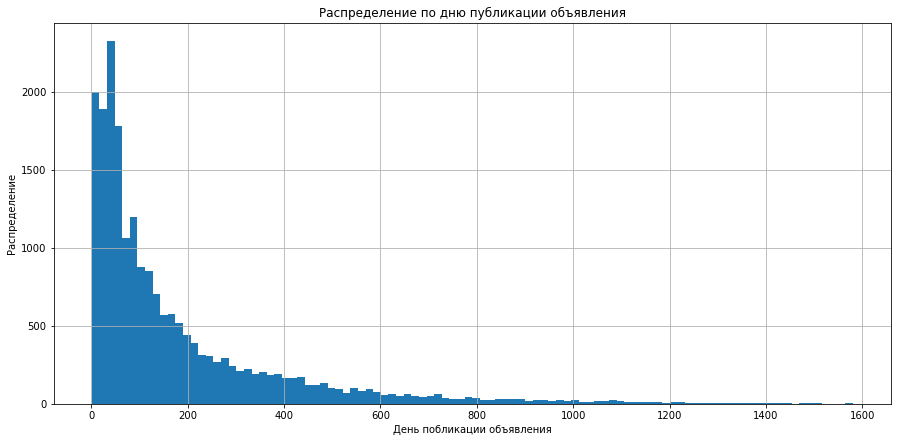

In [30]:
# гистограмма для парамаетра 'days exposition'
df['days_exposition'].plot(kind = 'hist', bins = 100, grid=True, figsize = (15,7))
plt.xlabel('День побликации объявления')
plt.ylabel('Распределение')
plt.title("Распределение по дню публикации объявления");


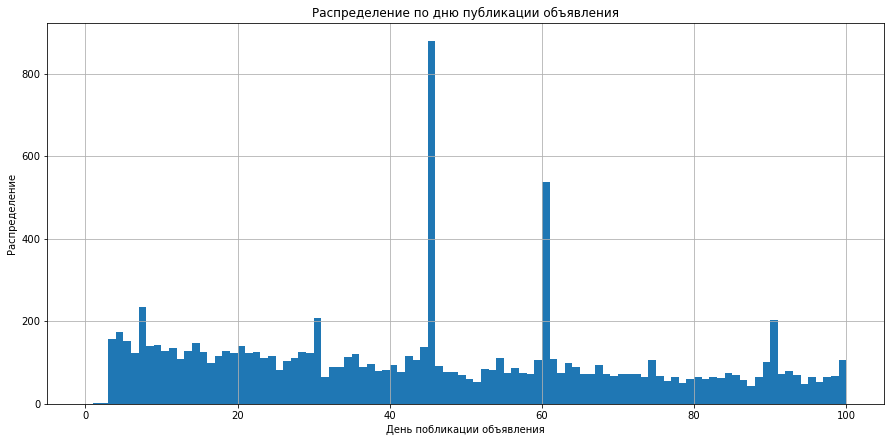

In [31]:
# более детально изучим отрезок от 0 до 100
df['days_exposition'].plot(kind = 'hist', bins = 100, grid=True, figsize = (15,7), range = (0,100))
plt.xlabel('День побликации объявления')
plt.ylabel('Распределение')
plt.title("Распределение по дню публикации объявления");


Детально изучив данные видим, что имеются значения, явно отклоняющиеся от нормальных: - 45, 60, 90. дней.
Исключим их из выборки, сохраним новые значения в отдельный фрейм. 

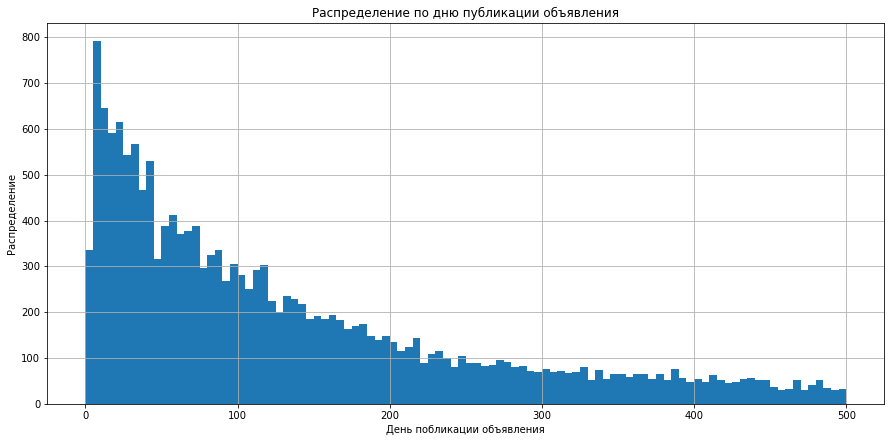

In [32]:
df = df.query('days_exposition != 60 and days_exposition != 45 and days_exposition != 90' )
df['days_exposition'].plot(kind = 'hist', bins = 100, grid=True, figsize = (15,7), range = (0,500))
plt.xlabel('День побликации объявления')
plt.ylabel('Распределение')
plt.title("Распределение по дню публикации объявления");


,days_exposition
day_first_day_exposition,
2,200.31
3,196.42
0,194.49
1,193.34
5,183.35
6,181.59
4,181.04


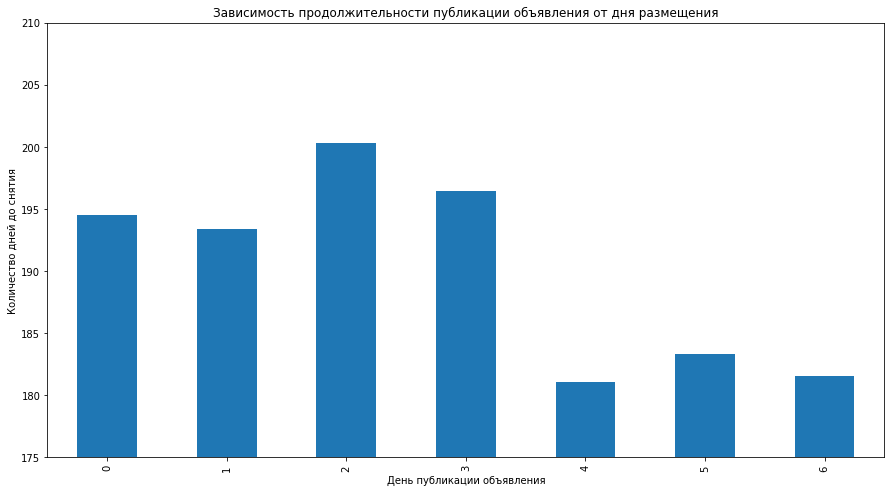

In [27]:
# проследим зависимость дня публикации и продолжительности объявления.
# для этого построим сводную таблицу по полям 'day_first_day_exposition' и days_exposition' и график

(
df
    .pivot_table(index = 'day_first_day_exposition',
    values = 'days_exposition', aggfunc ='mean')
    .plot(figsize =(15, 8), kind ='bar', ylim = (175,210), legend = False)
      
)
plt.xlabel('День публикации объявления')
plt.ylabel('Количество дней до снятия')
plt.title('Зависимость продолжительности публикации объявления от дня размещения')    

(
df
    .pivot_table(index = 'day_first_day_exposition',
    values = 'days_exposition', aggfunc ='mean').sort_values(by= 'days_exposition' ,ascending = False)
    
)

### Вывод.

Изучив время продажи квартиру, можем заключить, что большая часть объявлений держатся ориентироочно месяц, в дальнейшем наблюдаем постепенный спад. 
Примечательно, что объвления с самым большм временем публикаци чаще выкладываются в среду, хотя зависимость в этом пункте скорее случайна.

### 4.3. Исследование стоимости.<a class="anchor" id="section_4_3">

In [1]:
# для определения общих зависимостей построим матрицу корреляции по необходимым полям
matrix_df = df[['last_price',\
                'total_area',\
                'cityCenters_nearest',\
                'day_first_day_exposition',\
                'month_first_day_exposition',\
                'year_first_day_exposition',\
                'rooms',\
                'floors_total',\
               'ceiling_height']]

matrix_df.corr().style.background_gradient(cmap = 'coolwarm')

NameError: name 'df' is not defined

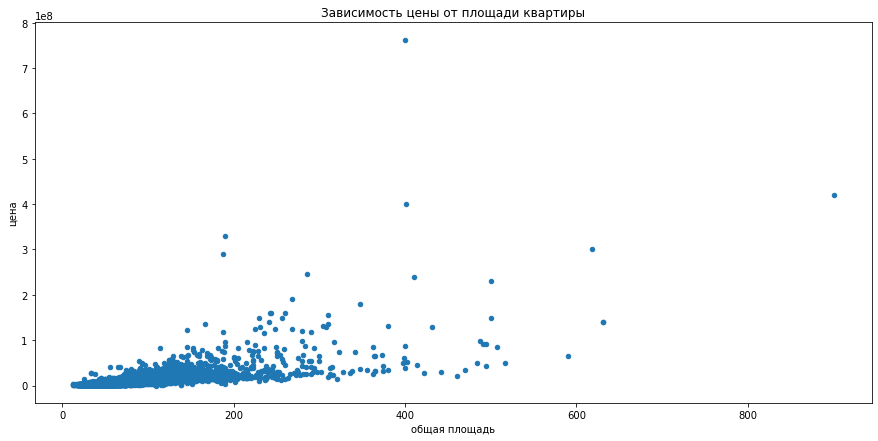

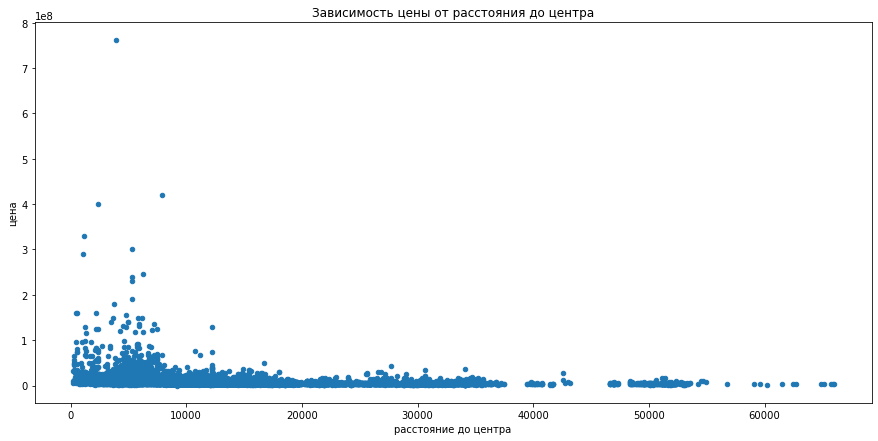

In [33]:
# так же построим диаграммы рассеяния для более детального изучения
x_names = ['общая площадь', 'расстояние до центра']
columns_for_price = ['total_area', 'cityCenters_nearest']
titles = ['Зависимость цены от площади квартиры', 'Зависимость цены от расстояния до центра']
for i in range(2):
    df.plot(y='last_price', x = columns_for_price[i],  kind='scatter', figsize=(15,7))
    plt.xlabel(x_names[i])
    plt.ylabel('цена')
    plt.title(titles[i])
    plt.show()
    

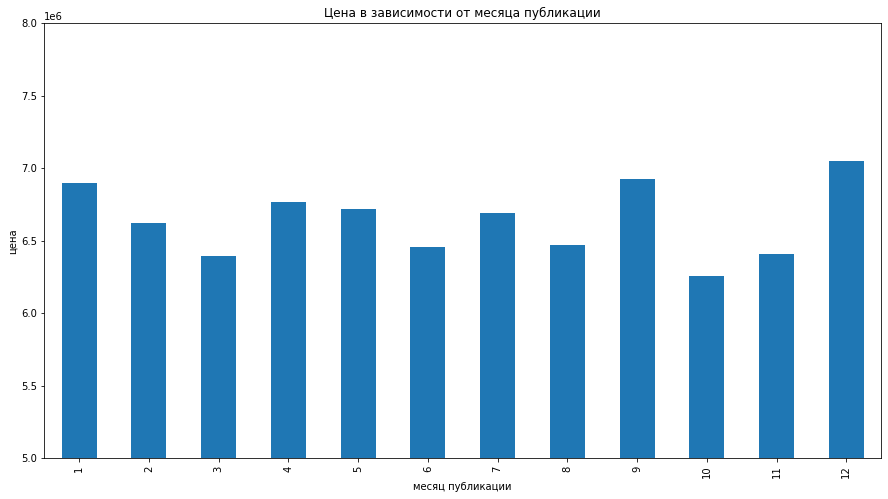

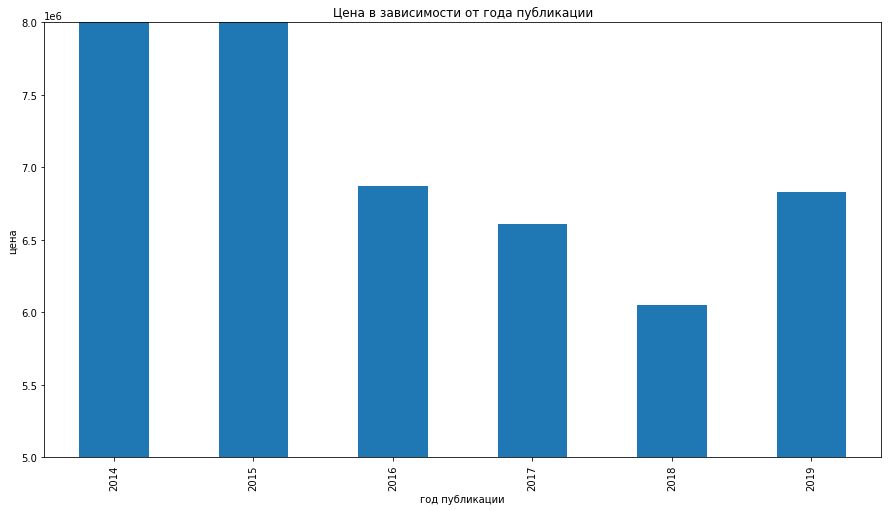

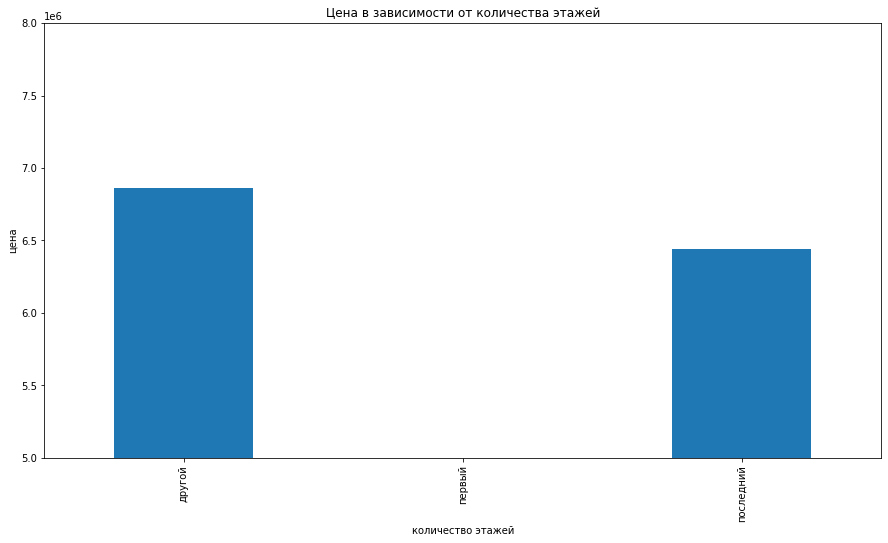

In [34]:
x_names = ['месяц публикации', 'год публикации','количество этажей']
columns_for_price = ['month_first_day_exposition', 'year_first_day_exposition','floor_type_column']
titles = names = ['Цена в зависимости от месяца публикации', 'Цена в зависимости от года публикации', 'Цена в зависимости от количества этажей']
for i in range(3):
    df.groupby(columns_for_price[i])['last_price'].mean().plot(kind = 'bar', figsize=(15,8))
    plt.xlabel(x_names[i])
    plt.ylabel('цена')
    plt.title(titles[i])
    plt.ylim(5000000,8000000)
    plt.show()    


In [31]:
# еще раз взглянем на общую картину данных
df.describe()


,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metrs,year_first_day_exposition,day_first_day_exposition,month_first_day_exposition,living_total_ration,kitchen_total_ratiom
count,"22,030.00","22,030.00","22,030.00","22,030.00","22,026.00","22,030.00","22,030.00","22,030.00","22,030.00","22,030.00",...,"16,618.00","22,030.00","17,080.00","18,850.00","22,030.00","22,030.00","22,030.00","22,030.00","22,030.00","22,030.00"
mean,9.99,"6,614,089.00",60.61,2.08,2.70,0.59,34.71,5.88,10.54,0.59,...,475.18,0.60,509.06,191.51,"99,960.07","2,017.36",2.55,6.41,0.56,0.19
std,5.67,"11,150,011.49",36.15,1.08,0.24,0.96,22.61,4.87,6.22,0.96,...,233.59,0.89,200.24,225.77,"50,293.78",1.06,1.78,3.48,0.10,0.07
min,0.00,"12,190.00",12.00,0.00,1.00,0.00,2.00,1.00,0.00,0.00,...,1.00,0.00,13.00,1.00,111.83,"2,014.00",0.00,1.00,0.02,0.00
25%,6.00,"3,450,000.00",40.00,1.00,2.60,0.00,19.00,2.00,7.00,0.00,...,428.50,0.00,461.75,41.00,"77,178.43","2,017.00",1.00,3.00,0.50,0.13
50%,10.00,"4,690,000.00",52.00,2.00,2.65,0.00,30.00,4.00,9.00,0.00,...,460.00,0.00,503.00,110.00,"95,238.10","2,017.00",3.00,6.00,0.56,0.18
75%,14.00,"6,800,000.00",70.00,3.00,2.71,1.00,42.30,8.00,12.00,1.00,...,460.00,1.00,557.00,252.00,"114,580.73","2,018.00",4.00,10.00,0.63,0.23
max,50.00,"763,000,000.00",900.00,19.00,10.00,5.00,409.70,33.00,112.00,5.00,...,"3,190.00",3.00,"1,344.00","1,580.00","1,907,500.00","2,019.00",6.00,12.00,1.00,0.79


In [32]:
# ограничим некоторые значения разумными пределами
df_clean = df.query('15 <= total_area <= 150')
df_clean = df_clean.query('last_price <= 20000000')
df_clean = df_clean.query('rooms <= 5')
df_clean = df_clean.query('1.8 < ceiling_height < 4')

df_clean.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,cost_per_metrs,year_first_day_exposition,day_first_day_exposition,month_first_day_exposition,living_total_ration,kitchen_total_ratiom
count,"21,073.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00",...,"15,682.00","21,073.00","16,143.00","18,161.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00","21,073.00"
mean,9.90,"5,353,751.83",55.65,1.98,2.68,0.60,31.83,5.90,9.92,0.60,...,476.59,0.56,512.88,187.36,"95,261.07","2,017.37",2.56,6.41,0.56,0.19
std,5.59,"3,068,986.48",21.72,0.93,0.19,0.96,14.69,4.88,4.63,0.96,...,230.60,0.86,197.97,221.62,"32,288.73",1.05,1.78,3.48,0.10,0.07
min,0.00,"12,190.00",15.00,0.00,2.00,0.00,2.00,1.00,0.00,0.00,...,1.00,0.00,13.00,1.00,111.83,"2,014.00",0.00,1.00,0.04,0.00
25%,6.00,"3,400,000.00",39.70,1.00,2.60,0.00,18.60,2.00,7.00,0.00,...,432.00,0.00,474.00,40.00,"76,458.75","2,017.00",1.00,3.00,0.50,0.14
50%,10.00,"4,550,000.00",50.70,2.00,2.65,0.00,30.00,4.00,9.00,0.00,...,460.00,0.00,503.00,107.00,"94,444.44","2,017.00",3.00,6.00,0.56,0.18
75%,14.00,"6,450,000.00",66.90,3.00,2.70,1.00,40.80,8.00,11.40,1.00,...,460.00,1.00,561.00,245.00,"112,500.00","2,018.00",4.00,10.00,0.63,0.23
max,50.00,"20,000,000.00",150.00,5.00,3.98,5.00,128.00,30.00,64.00,5.00,...,"3,190.00",3.00,"1,344.00","1,580.00","355,555.56","2,019.00",6.00,12.00,1.00,0.79


### Вывод:

Из полученных гистограграмм и матрицы корреляции можем сделать следующие выводы:

* 1. Имеет место практически линейна зависимость стоимости от площади квартиры, чем больше площадь, тем больше цена
* 2. Квартиры с большей стоиммостью по общей выборке распологаются на удалении в 20-35 км от центра.
* 3. Объявления с большей стоимостью чаще выкладываются на конец года - 12-й месяц.
* 4. в 14 -м и 15- м годах цены на недвижимость были максимальными.
* 5. Квартиры на первом этаже продаются значительно реже, чем на последнем.

### 4.4. Населенные пункты с наибольшей и наименьшей стоимостью жилья.<a class="anchor" id="section_4_4">

In [33]:
top_loc = (
    df.pivot_table(index = 'locality_name' , 
                   values = 'cost_per_metrs',aggfunc = ('count','mean'))
    .sort_values(by='count', ascending = False)
    .head(10)
)
print(top_loc[top_loc['mean'] == top_loc['mean'].max()])
print(top_loc[top_loc['mean'] == top_loc['mean'].min()])
# df.sort_values(by)

                 count       mean
locality_name                    
Санкт-Петербург  14827 114,880.63
               count      mean
locality_name                 
Выборг           209 58,113.82


### Вывод:
Насиленный пункт с наибольшей стоимостью за кв.м - Санкт -Петербург, с наименьшей - Выборг.

### 4.5 Анализ зависимости стоимости квартир в Санкт - Петербурге.<a class="anchor" id="section_4_5">

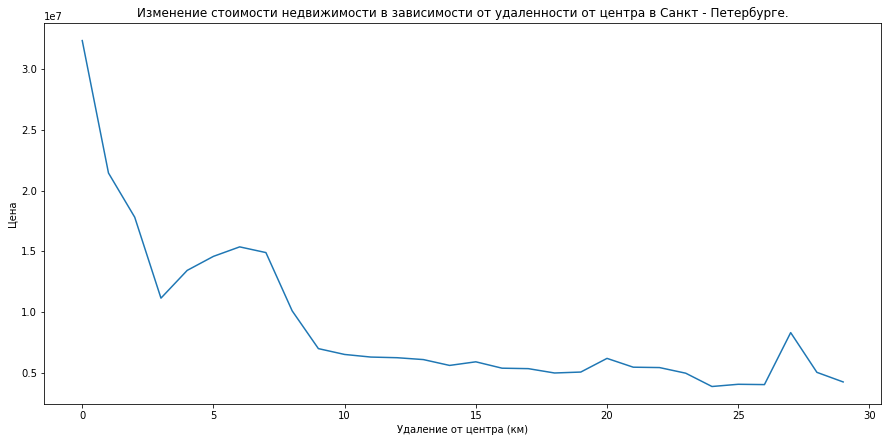

In [35]:
# выделим отдельный столбец с значениями удаленности от центра спб в км., построим график, для определния границ центра
spb_df = df.loc[df['locality_name'] == 'Санкт-Петербург']

spb_df['int_city_centre_km'] = (spb_df['cityCenters_nearest'].astype(int)/1000).round()

price_area = spb_df.groupby('int_city_centre_km')['last_price'].mean()

plt.figure(figsize=(15,7))
plt.title("Изменение стоимости недвижимости в зависимости от удаленности от центра в Санкт - Петербурге.")
plt.xlabel("Удаление от центра (км)")
plt.ylabel("Цена")
plt.plot(price_area.index, price_area.values)
plt.show;

Сильные изменения в графике наблюжаются после 9 км, считаю что радиуc в 9 км можно считать центром.

In [37]:
#выделим квартиры в центре
spb_center =  spb_df.query('int_city_centre_km < 9')

# ограничим датафрейм необходимыми данными для построения матрицы диаграмм рассеяния
df_matrix_spb = spb_center[['last_price', 'total_area', 'rooms', 'cityCenters_nearest','year_first_day_exposition','ceiling_height','floors_total']]
# pd.plotting.scatter_matrix(df_matrix_spb, figsize=(15, 15))

#так же построим матрицу коррелляции
df_matrix_spb.corr().style.background_gradient(cmap = 'coolwarm')



,last_price,total_area,rooms,cityCenters_nearest,year_first_day_exposition,ceiling_height,floors_total
last_price,1.000000,0.641210,0.342488,-0.077092,-0.043402,0.147363,0.057488
total_area,0.641210,1.000000,0.745545,-0.136091,-0.079822,0.260022,-0.000462
rooms,0.342488,0.745545,1.000000,-0.200152,-0.065314,0.226837,-0.084565
cityCenters_nearest,-0.077092,-0.136091,-0.200152,1.000000,0.044813,-0.229860,0.158594
year_first_day_exposition,-0.043402,-0.079822,-0.065314,0.044813,1.000000,0.028839,-0.036782
ceiling_height,0.147363,0.260022,0.226837,-0.229860,0.028839,1.000000,-0.045826
floors_total,0.057488,-0.000462,-0.084565,0.158594,-0.036782,-0.045826,1.000000


Для более детального изучения построим аналогичные построенным ранее графики для данных по центру Санкт - Петербурга.

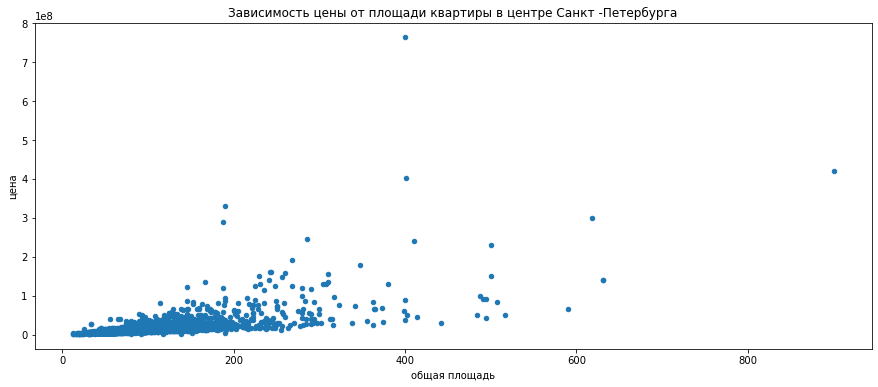

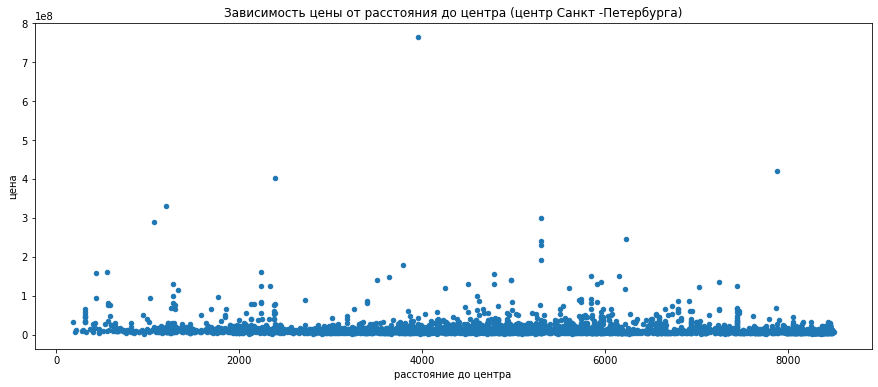

In [38]:
x_names = ['общая площадь', 'расстояние до центра']
columns_for_price = ['total_area', 'cityCenters_nearest']
titles = ['Зависимость цены от площади квартиры в центре Санкт -Петербурга', 'Зависимость цены от расстояния до центра (центр Санкт -Петербурга)']
for i in range(2):
    spb_center.plot(y='last_price', x = columns_for_price[i],  kind='scatter', figsize=(15,6))
    plt.xlabel(x_names[i])
    plt.ylabel('цена')
    plt.title(titles[i])
    plt.show()
    

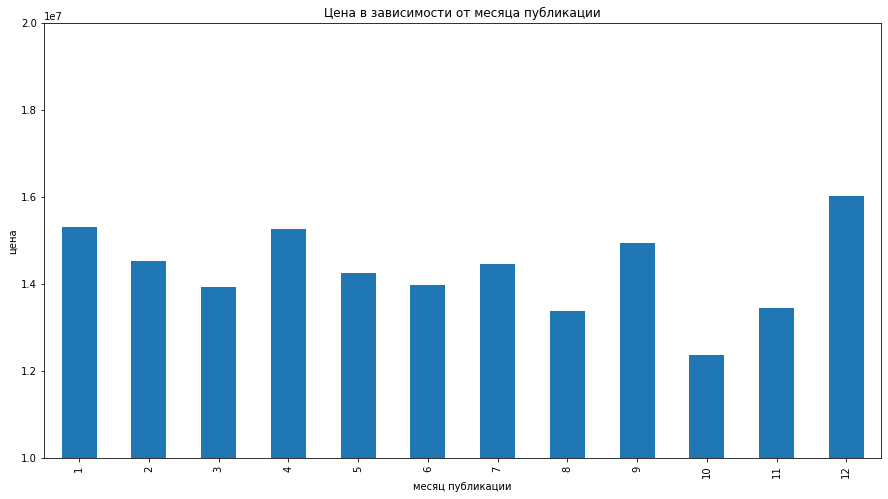

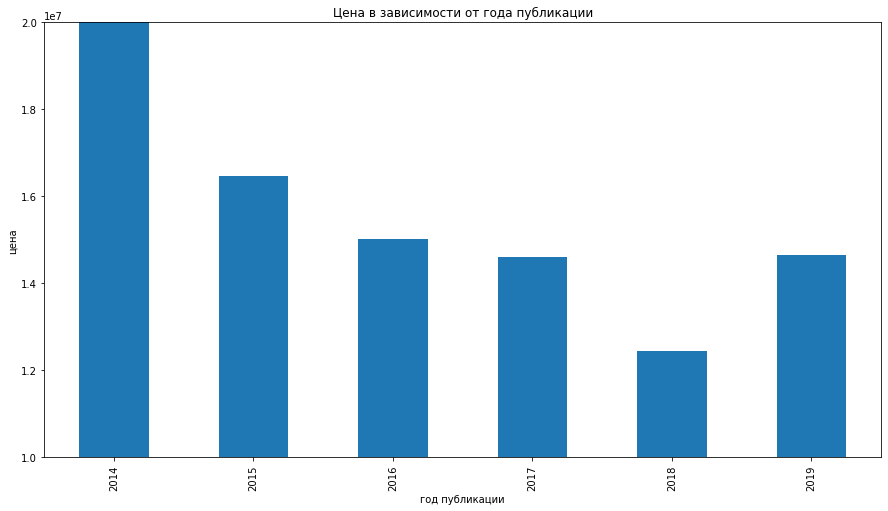

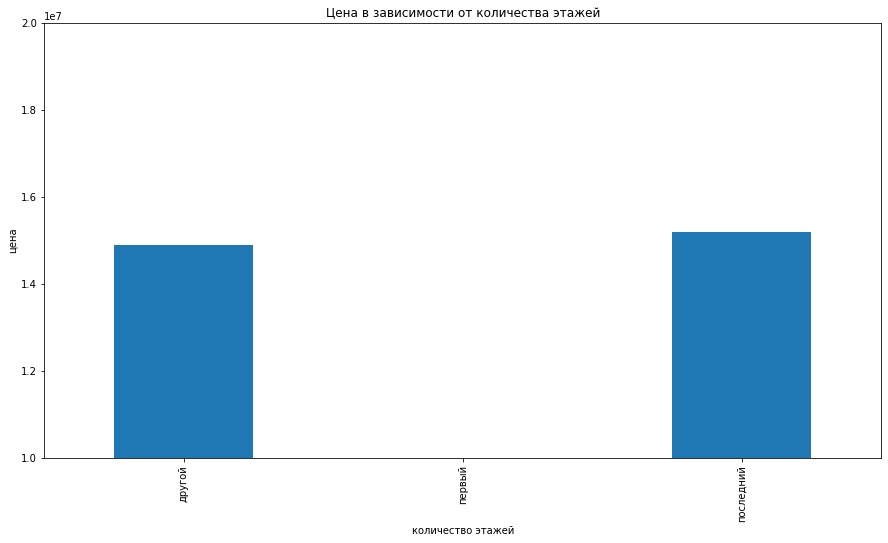

In [43]:
x_names = ['месяц публикации', 'год публикации','количество этажей']
columns_for_price = ['month_first_day_exposition', 'year_first_day_exposition','floor_type_column']
titles = ['Цена в зависимости от месяца публикации', 'Цена в зависимости от года публикации', 'Цена в зависимости от количества этажей']
for i in range(3):
    spb_center.groupby(columns_for_price[i])['last_price'].mean().plot(kind = 'bar', figsize=(15,8))
    plt.xlabel(x_names[i])
    plt.ylabel('цена')
    plt.title(titles[i])
    plt.ylim(10000000,20000000)
    plt.show() 

### Вывод:

Проанализировав данные о продаже квартир в Санкт - Петербурге удалось определить:
* 1. Центром города считается удаление на радиус 9 км, за границами радиуса цены за кв.м значительно падают.
* 2. Исходя из анализа графиков и коэффициента корреляции, можно сказать, что на цену в центре Санкт- Петербурга в меньшей степени влияет площадь, относительно остальных данных. Имеет место та же линейная зависимость, но коэффициент корреляции меньше - 0.643 в центре, 0.653 в общей выборке.
* 3. Относительно года публикации объявления, месяца и количества этажей значимых изменений не замечено. По данным показателям данные примерно те же, что и для остальных регионов.
* 4. В центре города меньше влияние таких факторов как: количество комнат (коэффициенты корреляции -0.34 и 0.36), высота потолков ( 0.24, 0.37)

## Общий вывод исследования. <a class="anchor" id="section_5">

В процессе анализа была проведена работа по очистке данных от некорретных значений, заполнению пропущенных медианными по группам или нулевыми, где не было возможности найти релевантные показатели.

 Входе анализа удалось сделать следубщие выводы по общему массиву данных:
 
* Имеет место практически линейна зависимость стоимости от площади квартиры, чем больше площадь, тем больше цена
* Квартиры с большей стоиммостью по общей выборке распологаются на удалении в 20-35 км от центра.
* Объявления с большей стоимостью чаще выкладываются на конец года - 12-й месяц.
* В 14 -м и 15- м годах цены на недвижимость были максимальными.
* Квартиры на первом этаже продаются значительно реже, чем на последнем.
 
 Также, в сравнении с выборкой по объявлениям о продаже недвижимости в центре Санкт -Питербурга было определно, что:
 
* 1. На цену на недвижимость в центре Санкт- Петербурга в меньшей степени влияет площадь, относительно остальных данных. Имеет место таже линейная зависимость, но коэффициент корреляции меньше - 0.643 в центре, 0.653 в общей выборке.
* 2. В центре города меньше влияние таких факторов как: количество комнат (коэффициенты корреляции -0.34 и 0.36), высота потолков ( 0.24, 0.37)
 
Меньшее влияние описанных показателей на стоимость недвижимости в центре Санкт - Питербурга может быть обусловлено непосредственно местоположением недвижимости: в исследуемом радиусе удаленность от центра является решающим фактором в определении стоимости жилья, в некоторой мере оттеняя такие факторы как: площадь, количество этажей, высота потолков.
В тоже время такие показатели как дата публикации объявления (день, месяц, год), зависимость от этажа, распределены в выборке равномерно.